<html>
    <head>
<span style="font-family: Algerian; color:green;font-size:30px;">
    <center><b><u>
        Google App Store</u></b>
    </center>
    </span>
        </head>
    </html>

Data set Information:
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.

<html>
    <head>
        <style>
        table {
                font-size: 25px;
                }
       </style>    
    </head>
<body>
   
<table align = left>
    <tr>
    <th>S.no</th>
    <th>Attribute </th>
    <th>Description</th>
  </tr>
    <tr>
     <td>1</td>
    <td>App</td>
    <td>Application name</td>
    </tr>
    <tr><td>2</td><td>Category</td><td align = left>Category the app belongs to.</td>
    </tr>
    <tr>
        <td>3</td><td>Rating</td><td>Overall user rating of the app</td>
    </tr>
    <tr>
        <td>4</td><td>Size</td><td>Size of the app</td>
    </tr>
    <tr>
        <td>5</td><td>Installs</td><td>Number of user reviews for the app</td>
    </tr>
    <tr>
        <td>6</td><td>Type</td><td>Paid or Free</td>
    </tr>
    <tr>
        <td>7</td><td>Price</td><td>Price of the app</td>
    </tr>
    <tr>
        <td>8</td><td>Content Rating </td><td>Age group the app is targeted at - children/Mature 21+ /Adult</td>
    </tr>
    <tr>
        <td>9</td><td>Genres</td><td>An app can belong to multiple genres (apart from its main category).<br> For eg. a
musical family game will belong to Music, Game, Family genres.</td>
    </tr>
    <tr>
        <td>10</td><td>Last Updated </td><td>Date when the app was last updated on play store.</td>
    </tr>
    <tr>
        <td>11</td><td>Current Ver </td><td>Current version of the app available on play store.</td>
    </tr>
    <tr>
        <td>12</td><td>Android Ver </td><td>Min required Android Version.</td>
    </tr>
</table>

</body>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       1. Import required libraries and read the dataset.</i></b>
    </center>
</span>
</html>

In [1]:
# Numerical libraries
import math
import numpy as np   


# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
g_df = pd.read_csv("Google play store .csv")
g_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>We can import the necessary pandas library and read the dataset using the <b><i><font color=#C1063C>pd.read_csv() function.</font></i></b></li><br>
 <li>The head() function is then used to <b><i><font color=#C1063C>display the first few rows of the dataset</font></i></b>, allowing us to get a glimpse of the data structure and the variables present.</li><br>
 <li>After running the code, we will see the first few rows of the dataset printed in the console. This will provide an overview of the dataset, including the column names and the corresponding values for each row.</li><br>
                </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.</i></b>
    </center>
</span>
</html>

In [3]:
g_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
g_df.tail()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
g_df.shape

(10841, 13)

In [6]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <p>Based on the printed dataset, we can make initial inferences and observations about the data, such as:</p><br>
 <li>The shape of the datatype can be obtained by <b><i><font color=#C1063C> shape() method.</font></i></b>There are  <b><i><font color=#C1063C> 10841 rows</font></i></b> and <b><i><font color=#C1063C> 13 columns.</font></i></b></li><br>
 <li>The data types of the columns are <b><i><font color=#C1063C> object</font></i></b> and <b><i><font color=#C1063C> float.</font></i></b></li><br>
  <li>There are missing values in the columns of <b><i><font color=#C1063C> Rating,Type ,Content Rating ,Current Ver,</font></i></b> and <b><i><font color=#C1063C> Android Ver </font></i></b>in the dataset.</li><br>
 <li>The memory usage of the dataset is <b><i><font color=#C1063C> 1.1 MB</font></i></b></li><br>
           </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.</i></b>
    </center>
</span>
</html>

In [7]:
# Description of numerical columns
g_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [8]:
# Description of Categorical columns
g_df.describe(include='O').transpose()

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


<html>
    <head>
    </head>
    <body>
     <h3><u><font color = green> Observations :</font></u></h3>   
    <p><li> In this code,<b><i><font color=#C1063C> describe().transpose function</font></i></b> is called on the DataFrame g_df to generate summary statistics for  <b><i><font color=#C1063C>numerical columns</font></i></b> </li> <br>
        <li>By default, describe() provides summary statistics for numerical columns, including count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value.</li><br> 
        <li><b><i><font color=#C1063C>Include object</font></i></b> method has been used to describe each categorical columns and if we exclude object only numerical columns will be excuted or we can mention it as only describe() to execute numerical values.</li><br>
    <li>The code then prints the summary statistics for both numerical and categorical columns separately.</li><br>
    </p>
    </body>
    </html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       4. Check if there are any duplicate records in the dataset? if any drop them.</i></b>
    </center>
</span>
</html>

In [9]:
# To get the duplicates of the dataset

duplicate = g_df.duplicated().sum()
duplicate

483

In [10]:
# To drop the duplicates of the dataset

g_df.drop_duplicates(inplace = True)

In [11]:
# To check whether the duplicates are dropped are not
g_df.duplicated().sum()

0

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>The method <b><i><font color=#C1063C>duplicated() </font></i></b>method on the DataFrame df to identify duplicate records. The result is a boolean Series where True indicates a duplicate record and False indicates a unique record.</li><br>

<li>The code employs the <b><i><font color=#C1063C>sum() </font></i></b>function on the boolean Series to count the number of duplicate records. This count is stored in the variable duplicate</li><br>

 <li>If the count of duplicate records (duplicate) is greater than zero, the code proceeds to remove the duplicate records using the <b><i><font color=#C1063C>drop_duplicates() </font></i></b>method.</li><br>
            <li>The code <b><i><font color=#C1063C>inplaced = True </font></i></b>inside the drop duplicates method reflect the change in the original database.</li><br>
                         </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.</i></b>
    </center>
</span>
</html>

In [12]:
# To Check the unique data in the 'Category column'

g_df['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
# Store the invalid data in 'a'

a = g_df[g_df['Category']=="1.9"].index
a

Int64Index([10472], dtype='int64')

In [14]:
# Drop the invalid category

g_df.drop(a , inplace =True)

In [15]:
g_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [16]:
g_df.shape

(10357, 13)

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
                <li>The unique category of the column <b><i><font color=#C1063C>'category'</font></i></b> can be identified by the command g_df['Category'].unique()</li><br>
               <li> While reviewing the category column there is one data which is invalid i.e <b><i><font color=#C1063C>1.9</font></i></b></li><br>
                <li>Hence the data 1.9 has been stored in another variable<b><i><font color=#C1063C> 'a'.</font></i></b></li><br>
                <li>Then it is dropped by the command - <b><i><font color=#C1063C>g_df.drop(a , inplace =True) </font></i></b>where <b><i><font color=#C1063C>inplace = True </font></i></b>is used to reflect the change in the original dataset.</li><br>
        </body>
    </head>
</html>

-------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)</i></b>
    </center>
</span>
</html>

In [17]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [18]:
g_df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10357, dtype: float64

In [19]:
# To check if there are any missing values or not 

missing_values = g_df['Rating'].isnull().sum()
missing_values

1465

In [20]:
# Drop the missing values

g_df.dropna(subset=['Rating'], inplace=True)

In [21]:
# Create 'Rating_category' column based on ratings
g_df['Rating_category'] = g_df['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')

# Print the updated DataFrame
g_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [22]:
g_df.shape

(8892, 14)

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>In this code, the <b><i><font color=#C1063C>isnull()</font></i></b> method is applied to the 'Rating' column of the DataFrame df to check for missing values. </li><br>
            <li>The <b><i><font color=#C1063C>sum() </font></i></b>function is then used to count the number of missing values. If missing values are found (<b><i><font color=#C1063C>missing_values > 0</font></i></b>), the code proceeds to drop the corresponding rows using the <b><i><font color=#C1063C>dropna() </font></i></b>method.</li><br>
            <li>After handling missing values, the code creates a new column 'Rating_category' using the <b><i><font color=#C1063C>apply() method.</font></i></b> </li><br>
            <li>For each rating value in the 'Rating' column, it applies a <b><i><font color=#C1063C>lambda </font></i></b>function that assigns 'High' if the rating is greater than 3.5, and 'Low' otherwise.</li><br>
            <li>Finally, the code displays the first few rows of the updated DataFrame, including the new <b><i><font color=#C1063C>'Rating_category'</font></i></b> column.</li><br>
                  </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.</i></b>
    </center>
</span>
</html>

In [23]:
# To create a varible rating_category_count and store the count values

rating_category_counts = g_df['Rating_category'].value_counts()
rating_category_counts

High    8012
Low      880
Name: Rating_category, dtype: int64

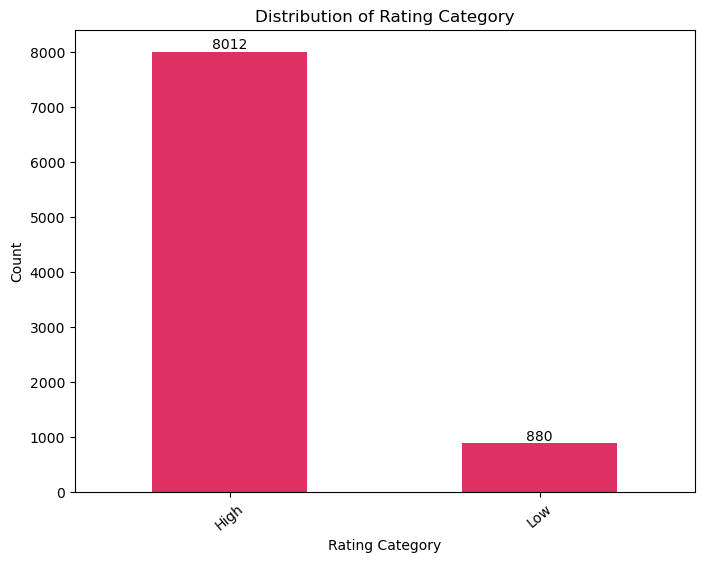

In [24]:
# Plot the distribution
plt.figure(figsize=(8, 6))
ax = rating_category_counts.plot(kind='bar', color = '#DE3163')
plt.title("Distribution of Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.xticks(rotation=40) 

# Add value annotations above each bar
for i, v in enumerate(rating_category_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()



<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
                <li>The revised data set has two data ie. High and Low. The total count of each value has been obtained by the code - <b><i><font color=#C1063C> g_df['Rating_category'].value_counts().</font></i></b></li><br>
                <li>The count values has been diplayed as bar graph.</li><br>
               <li>To get the annotations above each bar, use <b><i><font color=#C1063C> for loop</font></i></b> and <b><i><font color=#C1063C> enumerate </font></i></b>to get each index and value and print it above the bar graph</li><br>
                        </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)</i></b>
    </center>
</span>
</html>

In [25]:
# Convert the "Reviews" column to numeric data type
g_df['Reviews'] = pd.to_numeric(g_df['Reviews'], errors='coerce')

In [26]:
# Check for outliers in the "Reviews" column
Q1 = g_df['Reviews'].quantile(0.25)
Q3 = g_df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = g_df[(g_df['Reviews'] > upper_bound) | (g_df['Reviews'] < lower_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 1555


In [27]:
# Handle outliers using log transformation
g_df['Reviews_transformed'] = np.log1p(g_df['Reviews'])

# Display the updated DataFrame
g_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_transformed
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.875232


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
                <li>In this code, the <b><i><font color=#C1063C>pd.to_numeric()</font></i></b> function is used to convert the 'Reviews' column to a numeric data type. </li><br>
            <li><b><i><font color=#C1063C>The errors='coerce'</font></i></b> parameter ensures that any non-numeric values are converted to NaN.</li><br>

<li>After converting the column, the code checks for outliers using the <b><i><font color=#C1063C>Interquartile Range (IQR)</font></i></b> method. The lower and upper bounds are calculated based on the first quartile (Q1) and third quartile (Q3), respectively. </li><br>
    <li>Any value below the lower bound or above the upper bound is considered an <b><i><font color=#C1063C>outlier.</font></i></b></li><br>

<li>To handle the outliers, the code applies a log transformation (<b><i><font color=#C1063C>np.log1p()</font></i></b>) to the <b><i><font color=#C1063C>'Reviews_transformed' </font></i></b>column. This transformation helps to normalize the data and reduce the impact of extreme values.</li><br>

<li>Finally, the code displays the first few rows of the updated DataFrame, including the 'Reviews_tranformed' column.</li><br>        </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
      9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')</i></b>
    </center>
</span>
</html>

In [28]:
# Check the unique values count in the 'Size column'

g_df['Size'].value_counts()

Varies with device    1468
14M                    154
13M                    152
12M                    151
11M                    150
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

In [29]:
# Dropping the 'Varies with device' value from 'Size' column

g_df = g_df[g_df['Size'] != 'Varies with device']
g_df['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7424, dtype: object

In [30]:
g_df['Size'] = g_df['Size'].apply(lambda x: float(x[:-1]) * (10**6) if 'M' in x else float(x[:-1]) * (10**3))
g_df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

In [31]:
g_df['Size'].value_counts()

14000000.0    154
13000000.0    152
12000000.0    151
11000000.0    150
15000000.0    149
             ... 
383000.0        1
454000.0        1
812000.0        1
442000.0        1
619000.0        1
Name: Size, Length: 412, dtype: int64

In [32]:
# Convert the 'Size' column to a numeric data type

g_df['Size'] = pd.to_numeric(g_df['Size'], errors='coerce')
g_df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

In [33]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  7424 non-null   object 
 1   Category             7424 non-null   object 
 2   Rating               7424 non-null   float64
 3   Reviews              7424 non-null   int64  
 4   Size                 7424 non-null   float64
 5   Installs             7424 non-null   object 
 6   Type                 7424 non-null   object 
 7   Price                7424 non-null   object 
 8   Content Rating       7424 non-null   object 
 9   Genres               7424 non-null   object 
 10  Last Updated         7424 non-null   object 
 11  Current Ver          7420 non-null   object 
 12  Android Ver          7422 non-null   object 
 13  Rating_category      7424 non-null   object 
 14  Reviews_transformed  7424 non-null   float64
dtypes: float64(3), int64(1), object(11)
m

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
             <li>In this code, <b><i><font color=#C1063C>lambda function</font></i></b>  is used to replace 'M' with 10^6 (1 million) and 'K' with 10^3 (1 thousand) in the 'Size' column.</li><br> 
               <li>After replacing the values, the<b><i><font color=#C1063C> pd.to_numeric() </font></i></b>function is applied to convert the <b><i><font color=#C1063C>'Size'</font></i></b> column to a numeric data type. </li><br>
            <li>The code then drops the entries where the 'Size' column is <b><i><font color=#C1063C>'Varies with device' </font></i></b>using boolean indexing.</li><br>
                       </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.</i></b>
    </center>
</span>
</html>

In [34]:
g_df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [35]:
# Assuming you have a DataFrame named 'df'
# Treat unwanted characters in the 'Installs' column
g_df['Installs'] = g_df['Installs'].str.replace('[+,]', '', regex=True)
g_df['Installs']


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: object

In [36]:
# Convert the 'Installs' column to a numeric data type
g_df['Installs'] = pd.to_numeric(g_df['Installs'], errors='coerce')
g_df.dtypes

App                     object
Category                object
Rating                 float64
Reviews                  int64
Size                   float64
Installs                 int64
Type                    object
Price                   object
Content Rating          object
Genres                  object
Last Updated            object
Current Ver             object
Android Ver             object
Rating_category         object
Reviews_transformed    float64
dtype: object

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>In this code, the <b><i><font color=#C1063C>str.replace() </font></i></b>method is used to remove unwanted characters from the 'Installs' column.</li><br>
            <li> The regular expression <b><i><font color=#C1063C>[+,] </font></i></b>matches the plus sign (+) and comma (,) characters, and they are replaced with an empty string.</li><br>
            <li>After removing the unwanted characters, the <b><i><font color=#C1063C>pd.to_numeric() </font></i></b>function is applied to convert the <b><i><font color=#C1063C>'Installs'</font></i></b> column to a numeric data type.</li><br>
            <li> The <b><i><font color=#C1063C>errors='coerce'</font></i></b> parameter ensures that any non-numeric values are converted to NaN.</li><br>
            <li>Finally, the code displays the first few rows of the updated DataFrame, including the treated and converted <b><i><font color=#C1063C>'Installs'</font></i></b> column.</li><br>
                </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.</i></b>
    </center>
</span>
</html>

In [37]:
# View the data in the 'Price columns'

g_df['Price'].value_counts()

0          6877
$0.99       104
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [38]:
# Replace the '$' as empty string

g_df['Price'] = g_df['Price'].apply(lambda x: float(x.replace('$', '')))
g_df['Price'].value_counts()

0.00      6877
0.99       104
2.99        98
4.99        61
1.99        53
          ... 
6.49         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: Price, Length: 68, dtype: int64

In [39]:
# Converting the datatype

g_df['Price'] = pd.to_numeric(g_df['Price'], errors='coerce')
g_df['Price'].value_counts()

0.00      6877
0.99       104
2.99        98
4.99        61
1.99        53
          ... 
6.49         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: Price, Length: 68, dtype: int64

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>In this code, the <b><i><font color=#C1063C>lambda function</font></i></b> is used to remove unwanted characters from the 'Price' column. </li><br>
            <li>The regular expression 'dollar' matches the dollar sign  and they are replaced with an <b><i><font color=#C1063C>empty string.</font></i></b></li><br>
            <li>After removing the unwanted characters, the <b><i><font color=#C1063C>pd.to_numeric()</font></i></b> function is applied to convert the 'Price' column to a numeric data type. </li><br>
            <li>The <b><i><font color=#C1063C>errors='coerce' </font></i></b>parameter ensures that any non-numeric values are converted to NaN.</li><br>
            <li>Finally, the code displays the first few rows of the updated DataFrame, including the treated and converted <b><i><font color=#C1063C>'Price'</font></i></b> column.</li><br>
        </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
      12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)</i></b>
    </center>
</span>
</html>

In [40]:
# To view the columns in the dataset
g_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category', 'Reviews_transformed'],
      dtype='object')

In [41]:
# Storing the redundant columns in a vriable

redundant_cols = ['App','Rating','Genres','Last Updated','Current Ver','Android Ver']
g_df.drop(redundant_cols , axis=1, inplace = True)

In [42]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             7424 non-null   object 
 1   Reviews              7424 non-null   int64  
 2   Size                 7424 non-null   float64
 3   Installs             7424 non-null   int64  
 4   Type                 7424 non-null   object 
 5   Price                7424 non-null   float64
 6   Content Rating       7424 non-null   object 
 7   Rating_category      7424 non-null   object 
 8   Reviews_transformed  7424 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 580.0+ KB


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li> In this code, the <b><i><font color=#C1063C>drop() function </font></i></b>is used to remove the redundant columns from the DataFrame. The redundant_columns list contains the column names that are to be dropped.</li><br>
             <li> By specifying <b><i><font color=#C1063C>axis=1,</font></i></b> the columns are dropped along the <b><i><font color=#C1063C>horizontal axis.</font></i></b></li><br>
             <li> Finally, the code displays the updated DataFrame after dropping the redundant columns.</li><br>
             <li> The inference from this analysis is that the specified columns ('rating', 'App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver') have been dropped from the DataFrame. </li><br>
             <li> These columns were considered redundant for the analysis, as we have already created the 'Rating_category' feature from the 'Rating' column and the other columns are not relevant for our analysis.</li><br> 
             <li> By dropping these columns, the DataFrame is streamlined and ready for further analysis or modeling tasks.</li><br>
        </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       13. Encode the categorical columns.</i></b>
    </center>
</span>
</html>

In [43]:
g_df.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category', 'Reviews_transformed'],
      dtype='object')

In [44]:
g_df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_transformed
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,High,5.075174
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,High,6.875232
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,High,11.379520
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,High,12.281389
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,High,6.875232


In [45]:
# Changing the value from High to 1 and Low to 0

g_df['Rating_category'] = g_df['Rating_category'].map({'High' : 1, 'Low' : 0})
g_df['Rating_category']

0        1
1        1
2        1
3        1
4        1
        ..
10833    1
10834    1
10836    1
10837    1
10840    1
Name: Rating_category, Length: 7424, dtype: int64

In [46]:

g_df_encoded = pd.get_dummies(g_df)
g_df_encoded.head()

,Reviews,Size,Installs,Price,Rating_category,Reviews_transformed,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,0.0,1,5.075174,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,967,14000000.0,500000,0.0,1,6.875232,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,87510,8700000.0,5000000,0.0,1,11.379520,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,215644,25000000.0,50000000,0.0,1,12.281389,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,967,2800000.0,100000,0.0,1,6.875232,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [47]:
g_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Reviews                         7424 non-null   int64  
 1   Size                            7424 non-null   float64
 2   Installs                        7424 non-null   int64  
 3   Price                           7424 non-null   float64
 4   Rating_category                 7424 non-null   int64  
 5   Reviews_transformed             7424 non-null   float64
 6   Category_ART_AND_DESIGN         7424 non-null   uint8  
 7   Category_AUTO_AND_VEHICLES      7424 non-null   uint8  
 8   Category_BEAUTY                 7424 non-null   uint8  
 9   Category_BOOKS_AND_REFERENCE    7424 non-null   uint8  
 10  Category_BUSINESS               7424 non-null   uint8  
 11  Category_COMICS                 7424 non-null   uint8  
 12  Category_COMMUNICATION          7

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>In this code the target column is  <b><i><font color=#C1063C>'Rating category'</font></i></b> hence we change from categorical column to numerical column using the code -  <b><i><font color=#C1063C>g_df['Rating_category'].map({'High' : 1, 'Low' : 0})</font></i></b>  where values of  <b><i><font color=#C1063C>'High'</font></i></b>  are changed to  <b><i><font color=#C1063C>1 </font></i></b>and the values of  <b><i><font color=#C1063C>'Low'</font></i></b> are changed to  <b><i><font color=#C1063C>0</font></i></b></li><br>
            <li>The dataset has been encoded by the code -  <b><i><font color=#C1063C>pd.get_dummies(g_df)</font></i></b> by getting dummies of the categorical column</li><br>
                         </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       14. Segregate the target and independent features (Hint: Use Rating_category as the target)</i></b>
    </center>
</span>
</html>

In [48]:
# Segregate the target variable and independent features
X = g_df_encoded.drop('Rating_category', axis=1)  # Independent features (all columns except 'Rating_category')

y = g_df_encoded['Rating_category']  # Target variable

In [49]:
# Display the independent features (X) and target variable (y)
print("Independent features (X):")
print(X)
print("\nTarget variable (y):")
print(y)


Independent features (X):
       Reviews        Size  Installs  Price  Reviews_transformed  \
0          159  19000000.0     10000    0.0             5.075174   
1          967  14000000.0    500000    0.0             6.875232   
2        87510   8700000.0   5000000    0.0            11.379520   
3       215644  25000000.0  50000000    0.0            12.281389   
4          967   2800000.0    100000    0.0             6.875232   
...        ...         ...       ...    ...                  ...   
10833       44    619000.0      1000    0.0             3.806662   
10834        7   2600000.0       500    0.0             2.079442   
10836       38  53000000.0      5000    0.0             3.663562   
10837        4   3600000.0       100    0.0             1.609438   
10840   398307  19000000.0  10000000    0.0            12.894981   

       Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
0                            1                           0                0   

In [50]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10833    1
10834    1
10836    1
10837    1
10840    1
Name: Rating_category, Length: 7424, dtype: int64

In [51]:
X

,Reviews,Size,Installs,Price,Reviews_transformed,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,0.0,5.075174,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,967,14000000.0,500000,0.0,6.875232,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,87510,8700000.0,5000000,0.0,11.379520,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,215644,25000000.0,50000000,0.0,12.281389,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,967,2800000.0,100000,0.0,6.875232,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44,619000.0,1000,0.0,3.806662,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
10834,7,2600000.0,500,0.0,2.079442,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10836,38,53000000.0,5000,0.0,3.663562,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10837,4,3600000.0,100,0.0,1.609438,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
           <li> In this code, the <b><i><font color=#C1063C>drop() function </font></i></b> is used to remove the <b><i><font color=#C1063C>'Rating_category' </font></i></b> column from the DataFrame and assign the remaining columns to the 'X' variable, representing the independent features.
           <li>The <b><i><font color=#C1063C>'Rating_category'  </font></i></b>column is assigned to the 'y' variable, representing the target variable.
           <li>Finally, the code displays the first few rows of the independent features (X) and the target variable (y).
           <li>The DataFrame has been segregated into independent features (X) and the target variable (y). 
           <li>    The independent features (X) include all the columns except for 'Rating_category', while the target variable (y) contains the 'Rating_category' column.
           <li>    This separation allows for further analysis, feature engineering, and modeling tasks where we can use the independent features to predict the target variable.
                 </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
      15. Split the dataset into train and test.</i></b>
    </center>
</span>
</html>

In [52]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5196, 46) (2228, 46)
(5196,) (2228,)


<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
           <li>In this code, the <b><i><font color=#C1063C>train_test_split  </font></i></b>function is used to split the dataset into training and testing sets. </li><br>
           <li> The independent features (X) and the target variable (y) are passed as the function arguments. </li><br>
            <li>The test_size parameter is set to <b><i><font color=#C1063C> 0.3,</font></i></b> which means that 30% of the data will be used for testing, while the remaining 70% will be used for training. </li><br>
           <li> The random_state parameter is set to 42 to ensure <b><i><font color=#C1063C>reproducibility </font></i></b> of the split.</li><br>
           <li> After splitting the dataset, the code displays the <b><i><font color=#C1063C>shapes of the training </font></i></b> and <b><i><font color=#C1063C>testing sets, </font></i></b> indicating the number of samples and features in each set.</li><br>
            <li>The inference from this analysis is that the dataset has been split into <b><i><font color=#C1063C>training  </font></i></b>and <b><i><font color=#C1063C>testing  </font></i></b>sets.
               <li>  The training set (X_train, y_train) contains 70% of the data, which will be used to train the model, while the testing set (X_test, y_test) contains 30% of the data, which will be used to evaluate the model's performance.</li><br>
            <li>Splitting the dataset into train and test sets allows us to assess the model's generalization ability on unseen data.</li><br>
                 </body>
    </head>
</html>

--------------------------------------------------------------------------------------------------

<html>
<span style="font-family: Times New Roman; color:#000080; font-size: 18px;">
    <center><b><i>
       16. Standardize the data, so that the values are within a particular range.</i></b>
    </center>
</span>
</html>

In [53]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss

StandardScaler()

In [54]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train.shape,X_test.shape

((5196, 46), (2228, 46))

In [55]:
X_train

array([[-0.16217307,  0.13906904, -0.16736566, ...,  4.63610898,
        -0.3551589 , -0.01387418],
       [-0.04828855, -0.50074741,  0.04580871, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [-0.15486002, -0.74387767, -0.14701233, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       ...,
       [-0.15246639, -0.41543855, -0.15772461, ..., -0.21569812,
         2.81564114, -0.01387418],
       [ 0.08762424,  0.48030449,  0.04580871, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [-0.16226396,  0.86419436, -0.16842618, ..., -0.21569812,
        -0.3551589 , -0.01387418]])

In [56]:
X_test

array([[-0.0280171 ,  2.48506272, -0.06131409, ..., -0.21569812,
         2.81564114, -0.01387418],
       [-0.16221972, -0.64577248, -0.16822264, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [-0.1622233 , -0.8462483 , -0.16822264, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       ...,
       [-0.08896061,  0.30968677, -0.14701233, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [ 0.35031297, -0.63297615,  1.97401915, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [-0.15086445,  2.8689526 , -0.16629443, ..., -0.21569812,
        -0.3551589 , -0.01387418]])

<html>
    <head>
        <body>
            <h3><u><font color = green> Observations :</font></u></h3><br>
            <li>In this code, the <b><i><font color=#C1063C> StandardScaler</font></i></b> class is used to standardize the data.</li><br>
            <li>First, an instance of the scaler is created. </li><br>
            <li>Then, the <b><i><font color=#C1063C> fit_transform()</font></i></b> method is called on the training data (X_train) to calculate the mean and standard deviation required for standardization. </li><br>
            <li>Next, the <b><i><font color=#C1063C> transform() </font></i></b>method is used to standardize both the training and testing data based on the calculated mean and standard deviation.</li><br>
             <li>  Finally, the code displays the first few rows of the standardized training and testing data.
             <li>The data has been standardized using the<b><i><font color=#C1063C>  StandardScaler.</font></i></b></li><br>
            <li>Standardization brings the values of the features within a particular range by subtracting the mean and dividing by the standard deviation. </li><br>
                  </body>
    </head>
</html>

<html>
    <head>
      <b>  
       <center>  <span style="font-family: Algerian; color:#000080;font-size:30px;">Thank you</span></center> 
    <left>
       <span style="font-family: Algerian; color:green;font-size:25px;">By </span><br><br>
        <span style="font-family: Algerian; color:#C1063C;font-size:25px;">Anies Ghousia.J</span> 
           </left>
           </b>
        </head>
    </html>
        



--------------------------------------------------------------------------------------------------